In [38]:
# to be ignored when copying in the main file
import pandas as pd
import requests
import json
import time

#1 to be added

import numpy as np
import datetime
from datetime import *
from dateutil.relativedelta import *
import calendar
import matplotlib                                            
import matplotlib.pyplot as plt 
%matplotlib inline  

In [39]:
#2 importing Wiki csv

wikidata = pd.read_csv('books_per_view.csv')
Wiki =pd.DataFrame(wikidata)
# change the titles to upper case
Wiki['Page'] = Wiki['Page'].str.upper()


In [40]:
#3 importing NYTimes
NYTimes = pd.read_csv('result_selectedcategory.csv')
NYT =pd.DataFrame(NYTimes[['rank', 'title','author','date','month_on_list','list']])
pd.set_option('display.max_rows', 100)
#NYT2 = NYT[['rank', 'title','author','date','month_on_list']]

In [41]:
NYT

,rank,title,author,date,month_on_list,list
0,1,ALONE,Lisa Gardner,2011-03-01,1.0,combined-print-and-e-book-fiction
1,2,TICK TOCK,James Patterson and Michael Ledwidge,2011-03-01,2.0,combined-print-and-e-book-fiction
2,3,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,2011-03-01,8.0,combined-print-and-e-book-fiction
3,4,WATER FOR ELEPHANTS,Sara Gruen,2011-03-01,5.0,combined-print-and-e-book-fiction
4,5,THE GIRL WHO PLAYED WITH FIRE,Stieg Larsson,2011-03-01,7.0,combined-print-and-e-book-fiction
...,...,...,...,...,...,...
1940,11,MICHAEL CRICHTON: THE ANDROMEDA EVOLUTION,Daniel H Wilson,2019-12-01,1.0,combined-print-and-e-book-fiction
1941,12,THE FAMILY UPSTAIRS,Lisa Jewell,2019-12-01,1.0,combined-print-and-e-book-fiction
1942,13,THE DESERTER,Nelson DeMille and Alex DeMille,2019-12-01,1.0,combined-print-and-e-book-fiction
1943,14,THE STARLESS SEA,Erin Morgenstern,2019-12-01,1.0,combined-print-and-e-book-fiction


In [42]:
#4 Find the number of books in NYT
len(NYT.title.unique())

1082

In [44]:
#5 Filtering for  just one category to reduce the number of duplicates
NYT = NYT.loc[NYT['list'] == 'combined-print-and-e-book-fiction']
NYT

,rank,title,author,date,month_on_list,list
0,1,ALONE,Lisa Gardner,2011-03-01,1.0,combined-print-and-e-book-fiction
1,2,TICK TOCK,James Patterson and Michael Ledwidge,2011-03-01,2.0,combined-print-and-e-book-fiction
2,3,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,2011-03-01,8.0,combined-print-and-e-book-fiction
3,4,WATER FOR ELEPHANTS,Sara Gruen,2011-03-01,5.0,combined-print-and-e-book-fiction
4,5,THE GIRL WHO PLAYED WITH FIRE,Stieg Larsson,2011-03-01,7.0,combined-print-and-e-book-fiction
...,...,...,...,...,...,...
1940,11,MICHAEL CRICHTON: THE ANDROMEDA EVOLUTION,Daniel H Wilson,2019-12-01,1.0,combined-print-and-e-book-fiction
1941,12,THE FAMILY UPSTAIRS,Lisa Jewell,2019-12-01,1.0,combined-print-and-e-book-fiction
1942,13,THE DESERTER,Nelson DeMille and Alex DeMille,2019-12-01,1.0,combined-print-and-e-book-fiction
1943,14,THE STARLESS SEA,Erin Morgenstern,2019-12-01,1.0,combined-print-and-e-book-fiction


In [7]:
#6 Find the number of books in NYT after filtering
len(NYT.title.unique())

1082

In [8]:
#7 find duplicates in NYT

DuplicatesNYT = NYT[NYT.duplicated(['title'])]
print("Duplicated Rows are :", DuplicatesNYT[['title','date','month_on_list']], sep='\n')

Duplicated Rows are :
                                      title        date  month_on_list
20                      WATER FOR ELEPHANTS  2011-04-01            3.0
25    THE GIRL WHO KICKED THE HORNET’S NEST  2011-04-01            9.0
27          THE GIRL WITH THE DRAGON TATTOO  2011-04-01            8.0
28            THE GIRL WHO PLAYED WITH FIRE  2011-04-01            7.0
29                        CUTTING FOR STONE  2011-04-01            4.0
...                                     ...         ...            ...
1936                        THE DUTCH HOUSE  2019-12-01            2.0
1937                     THE GIVER OF STARS  2019-12-01            2.0
1938                          THE INSTITUTE  2019-12-01            3.0
1939                     THE 19TH CHRISTMAS  2019-12-01            2.0
1944                         THE TESTAMENTS  2019-12-01            3.0

[863 rows x 3 columns]


In [9]:
#Dealing with duplicated entres## 

#8 Checking the reason for duplication based on one book.

NYT.loc[NYT['title'] == 'IT']

,rank,title,author,date,month_on_list,list
1541,2,IT,Stephen King,2017-10-01,2.0,combined-print-and-e-book-fiction
1558,4,IT,Stephen King,2017-11-01,2.0,combined-print-and-e-book-fiction
1906,7,IT,Stephen King,2019-10-01,1.0,combined-print-and-e-book-fiction


Result: The duplication happens becase of different dates the book was placed on the bestsellers list, the duration on the list, and the different rank each placement had. 

In [10]:
#9. Creating a copy of NYT dataset and assigning a new column to store the last month book was on the list. 
NYT_mod1 = NYT.copy()
NYT_mod1['last_month'] = NYT.apply(lambda _: '', axis=1)
NYT_mod1

,rank,title,author,date,month_on_list,list,last_month
0,1,ALONE,Lisa Gardner,2011-03-01,1.0,combined-print-and-e-book-fiction,
1,2,TICK TOCK,James Patterson and Michael Ledwidge,2011-03-01,2.0,combined-print-and-e-book-fiction,
2,3,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,2011-03-01,8.0,combined-print-and-e-book-fiction,
3,4,WATER FOR ELEPHANTS,Sara Gruen,2011-03-01,5.0,combined-print-and-e-book-fiction,
4,5,THE GIRL WHO PLAYED WITH FIRE,Stieg Larsson,2011-03-01,7.0,combined-print-and-e-book-fiction,
...,...,...,...,...,...,...,...
1940,11,MICHAEL CRICHTON: THE ANDROMEDA EVOLUTION,Daniel H Wilson,2019-12-01,1.0,combined-print-and-e-book-fiction,
1941,12,THE FAMILY UPSTAIRS,Lisa Jewell,2019-12-01,1.0,combined-print-and-e-book-fiction,
1942,13,THE DESERTER,Nelson DeMille and Alex DeMille,2019-12-01,1.0,combined-print-and-e-book-fiction,
1943,14,THE STARLESS SEA,Erin Morgenstern,2019-12-01,1.0,combined-print-and-e-book-fiction,


In [11]:
#10 Calculating End Date
NYT_mod1['date'] = pd.to_datetime(NYT_mod1['date'])
NYT_mod1['last_month'] = pd.to_datetime(NYT_mod1['last_month'])

f = lambda x: x ['date'] + relativedelta(months = int(x['month_on_list']))
NYT_mod1['last_month'] = NYT_mod1.apply(f, axis=1)

NYT_mod1

,rank,title,author,date,month_on_list,list,last_month
0,1,ALONE,Lisa Gardner,2011-03-01,1.0,combined-print-and-e-book-fiction,2011-04-01
1,2,TICK TOCK,James Patterson and Michael Ledwidge,2011-03-01,2.0,combined-print-and-e-book-fiction,2011-05-01
2,3,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,2011-03-01,8.0,combined-print-and-e-book-fiction,2011-11-01
3,4,WATER FOR ELEPHANTS,Sara Gruen,2011-03-01,5.0,combined-print-and-e-book-fiction,2011-08-01
4,5,THE GIRL WHO PLAYED WITH FIRE,Stieg Larsson,2011-03-01,7.0,combined-print-and-e-book-fiction,2011-10-01
...,...,...,...,...,...,...,...
1940,11,MICHAEL CRICHTON: THE ANDROMEDA EVOLUTION,Daniel H Wilson,2019-12-01,1.0,combined-print-and-e-book-fiction,2020-01-01
1941,12,THE FAMILY UPSTAIRS,Lisa Jewell,2019-12-01,1.0,combined-print-and-e-book-fiction,2020-01-01
1942,13,THE DESERTER,Nelson DeMille and Alex DeMille,2019-12-01,1.0,combined-print-and-e-book-fiction,2020-01-01
1943,14,THE STARLESS SEA,Erin Morgenstern,2019-12-01,1.0,combined-print-and-e-book-fiction,2020-01-01


In [12]:
#11 Finding the earliest start date and the latest end date
later_end_date = (pd.DataFrame(NYT_mod1.groupby('title')['last_month'].max())).rename(columns = {'last_month':'E_Date'})
earlier_start_date = (pd.DataFrame(NYT_mod1.groupby('title')['date'].min())).rename(columns = {'date':'S_Date'})

In [13]:
#12 Merging the obtained dates with the main NYT dataset

obtained_dates = later_end_date.merge(earlier_start_date, on = 'title')

NYT_mod2 = NYT_mod1.copy().merge(obtained_dates, on = 'title')

len(NYT_mod2)


1945

In [14]:
#13 getting rid of  last_month column

NYT_mod2.head()
NYT_mod2 = NYT_mod2.drop(['last_month'], axis = 1)
NYT_mod2.head()

,rank,title,author,date,month_on_list,list,E_Date,S_Date
0,1,ALONE,Lisa Gardner,2011-03-01,1.0,combined-print-and-e-book-fiction,2011-04-01,2011-03-01
1,2,TICK TOCK,James Patterson and Michael Ledwidge,2011-03-01,2.0,combined-print-and-e-book-fiction,2011-06-01,2011-03-01
2,11,TICK TOCK,James Patterson and Michael Ledwidge,2011-04-01,2.0,combined-print-and-e-book-fiction,2011-06-01,2011-03-01
3,3,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,2011-03-01,8.0,combined-print-and-e-book-fiction,2012-12-01,2011-03-01
4,8,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,2011-04-01,8.0,combined-print-and-e-book-fiction,2012-12-01,2011-03-01


In [15]:
#14 Calculating the average rank of each book to reduce the duplicates and storing it in a table

average_rank = pd.DataFrame(NYT_mod2.groupby('title')['rank'].mean()).rename(columns = {'rank': 'NYT_average_rank'})
len(average_rank)

1082

In [16]:
#15 Calculating the average duration of books between the entries for individual books and storing it in a table

average_duration=pd.DataFrame(NYT_mod2.groupby('title')['month_on_list'].mean()).rename(columns = {'month_on_list': 'average_duration'})

len(average_duration)

1082

In [17]:
NYT_mod2.head()

,rank,title,author,date,month_on_list,list,E_Date,S_Date
0,1,ALONE,Lisa Gardner,2011-03-01,1.0,combined-print-and-e-book-fiction,2011-04-01,2011-03-01
1,2,TICK TOCK,James Patterson and Michael Ledwidge,2011-03-01,2.0,combined-print-and-e-book-fiction,2011-06-01,2011-03-01
2,11,TICK TOCK,James Patterson and Michael Ledwidge,2011-04-01,2.0,combined-print-and-e-book-fiction,2011-06-01,2011-03-01
3,3,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,2011-03-01,8.0,combined-print-and-e-book-fiction,2012-12-01,2011-03-01
4,8,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,2011-04-01,8.0,combined-print-and-e-book-fiction,2012-12-01,2011-03-01


In [18]:
#16 Dropping original rank, date and month_on_list from the NYT Table

NYT_mod2 =NYT_mod2.drop(columns = ['rank','month_on_list','date'], axis = 1)

len(NYT_mod2.title.unique())

1082

In [19]:
len(NYT_mod2)

1945

In [20]:
NYT_mod2.loc[NYT_mod2['title'] == 'IT']

,title,author,list,E_Date,S_Date
1581,IT,Stephen King,combined-print-and-e-book-fiction,2019-11-01,2017-10-01
1582,IT,Stephen King,combined-print-and-e-book-fiction,2019-11-01,2017-10-01
1583,IT,Stephen King,combined-print-and-e-book-fiction,2019-11-01,2017-10-01


In [55]:
#17 Dropping duplicates
NYT_mod3 = NYT_mod2.drop_duplicates(['title'], keep='last')
len(NYT_mod3)


1082

<bound method Series.unique of 0                                           ALONE
2                                       TICK TOCK
11                THE GIRL WITH THE DRAGON TATTOO
20                            WATER FOR ELEPHANTS
28                  THE GIRL WHO PLAYED WITH FIRE
                          ...                    
1940                               THE NIGHT FIRE
1941    MICHAEL CRICHTON: THE ANDROMEDA EVOLUTION
1942                          THE FAMILY UPSTAIRS
1943                                 THE DESERTER
1944                             THE STARLESS SEA
Name: title, Length: 1082, dtype: object>

In [22]:
#18 Checking a sample

NYT_mod3.loc[NYT_mod3['title'] == 'IT']



,title,author,list,E_Date,S_Date
1583,IT,Stephen King,combined-print-and-e-book-fiction,2019-11-01,2017-10-01


In [23]:
len(NYT_mod3) == len(NYT_mod3.title.unique())

True

In [54]:
NYT_mod3.to_csv('Sabrina.csv')

In [24]:
#19 Merging the calculated rank, and number of months  with the NYT data
NYT_mod4 = NYT_mod3.copy().merge(average_rank, on = 'title').merge(average_duration, on = 'title')


decimals = 1    
NYT_mod4['average_duration'] =NYT_mod4['average_duration'].apply(lambda x: round(x, decimals))
NYT_mod4['NYT_average_rank'] =NYT_mod4['NYT_average_rank'].apply(lambda x: round(x, decimals))


In [25]:
NYT_mod4.head()

,title,author,list,E_Date,S_Date,NYT_average_rank,average_duration
0,ALONE,Lisa Gardner,combined-print-and-e-book-fiction,2011-04-01,2011-03-01,1.0,1.0
1,TICK TOCK,James Patterson and Michael Ledwidge,combined-print-and-e-book-fiction,2011-06-01,2011-03-01,6.5,2.0
2,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,combined-print-and-e-book-fiction,2012-12-01,2011-03-01,9.7,7.2
3,WATER FOR ELEPHANTS,Sara Gruen,combined-print-and-e-book-fiction,2012-07-01,2011-03-01,7.7,3.9
4,THE GIRL WHO PLAYED WITH FIRE,Stieg Larsson,combined-print-and-e-book-fiction,2012-12-01,2011-03-01,12.4,6.2


In [26]:
#20 Merging the NYT and Wiki

Combo = pd.merge(Wiki, NYT_mod4, left_on='Page', right_on='title')
Combo

,Unnamed: 0,Rank,Page,Views in millions,title,author,list,E_Date,S_Date,NYT_average_rank,average_duration
0,1,2,FIFTY SHADES OF GREY,49,FIFTY SHADES OF GREY,E L James,combined-print-and-e-book-fiction,2017-01-01,2012-04-01,8.5,18.3
1,8,9,A GAME OF THRONES,27,A GAME OF THRONES,George RR Martin,combined-print-and-e-book-fiction,2021-04-01,2011-05-01,12.0,21.1
2,13,14,THE HANDMAID'S TALE,22,THE HANDMAID'S TALE,Margaret Atwood,combined-print-and-e-book-fiction,2020-06-01,2017-03-01,9.4,8.0
3,18,17,THE GIRL WITH THE DRAGON TATTOO,20,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,combined-print-and-e-book-fiction,2012-12-01,2011-03-01,9.7,7.2
4,20,21,INFERNO,19,INFERNO,Dan Brown,combined-print-and-e-book-fiction,2016-12-01,2013-06-01,6.8,3.5
5,21,22,IT,18,IT,Stephen King,combined-print-and-e-book-fiction,2019-11-01,2017-10-01,4.3,1.7


In [27]:
#21 dropping the newly created index and Wiki_Title

Combo = Combo.drop(columns = ['Unnamed: 0', 'Page', 'list'], axis = 1)
Combo.columns

Index(['Rank', 'Views in millions', 'title', 'author', 'E_Date', 'S_Date',
       'NYT_average_rank', 'average_duration'],
      dtype='object')

In [28]:
#22. Column renaming
Combo = Combo.rename(columns = {'Rank':'Wiki_Rank', 'Views in millions': 'Wiki_Page_Visits', 
                                    'title': 'Book','author':'Author','E_Date':'To','S_Date':'From', 'NYT_average_rank':'NYT_Rank(avg)', 'average_duration':'Months_on_NYT_list(avg)'})
Combo

,Wiki_Rank,Wiki_Page_Visits,Book,Author,To,From,NYT_Rank(avg),Months_on_NYT_list(avg)
0,2,49,FIFTY SHADES OF GREY,E L James,2017-01-01,2012-04-01,8.5,18.3
1,9,27,A GAME OF THRONES,George RR Martin,2021-04-01,2011-05-01,12.0,21.1
2,14,22,THE HANDMAID'S TALE,Margaret Atwood,2020-06-01,2017-03-01,9.4,8.0
3,17,20,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,2012-12-01,2011-03-01,9.7,7.2
4,21,19,INFERNO,Dan Brown,2016-12-01,2013-06-01,6.8,3.5
5,22,18,IT,Stephen King,2019-11-01,2017-10-01,4.3,1.7


In [29]:
#23. Column reordering

column_order = ['Book', 'Author','Wiki_Rank', 'NYT_Rank(avg)', 'Months_on_NYT_list(avg)','From','To','Wiki_Page_Visits']
Combo = Combo[column_order]

In [30]:
Combo

,Book,Author,Wiki_Rank,NYT_Rank(avg),Months_on_NYT_list(avg),From,To,Wiki_Page_Visits
0,FIFTY SHADES OF GREY,E L James,2,8.5,18.3,2012-04-01,2017-01-01,49
1,A GAME OF THRONES,George RR Martin,9,12.0,21.1,2011-05-01,2021-04-01,27
2,THE HANDMAID'S TALE,Margaret Atwood,14,9.4,8.0,2017-03-01,2020-06-01,22
3,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,17,9.7,7.2,2011-03-01,2012-12-01,20
4,INFERNO,Dan Brown,21,6.8,3.5,2013-06-01,2016-12-01,19
5,IT,Stephen King,22,4.3,1.7,2017-10-01,2019-11-01,18


In [31]:
#24 round the numbers in NYT-rank and Months
decimals = 1    
Combo['NYT_Rank(avg)'] = Combo['NYT_Rank(avg)'].apply(lambda x: round(x, decimals))
Combo['Months_on_NYT_list(avg)'] = Combo['Months_on_NYT_list(avg)'].apply(lambda x: round(x, decimals))

In [51]:
Combo1 = Combo.drop(['To'], axis = 1)
Combo1

,Book,Author,Wiki_Rank,NYT_Rank(avg),Months_on_NYT_list(avg),From,Wiki_Page_Visits
0,FIFTY SHADES OF GREY,E L James,2,8.5,18.3,2012-04-01,49
1,A GAME OF THRONES,George RR Martin,9,12.0,21.1,2011-05-01,27
2,THE HANDMAID'S TALE,Margaret Atwood,14,9.4,8.0,2017-03-01,22
3,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,17,9.7,7.2,2011-03-01,20
4,INFERNO,Dan Brown,21,6.8,3.5,2013-06-01,19
5,IT,Stephen King,22,4.3,1.7,2017-10-01,18


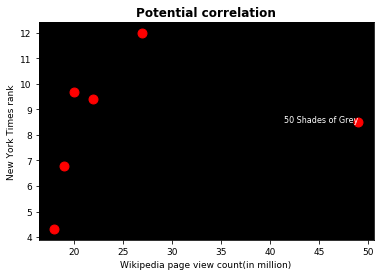

In [33]:
#25 plotting the results

fig, ax = plt.subplots(figsize=(6,4))
#x = Combo['Wiki_Page_Visits']
#y = Combo['NYT_Rank(avg)']
ax.scatter(Combo['Wiki_Page_Visits'],Combo['NYT_Rank(avg)'],s =80,  color = 'red')
ax.set_title('Potential correlation', color = 'black',size = 12,fontweight="bold")
plt.xlabel('Wikipedia page view count(in million)', size = 9)
plt.ylabel('New York Times rank', size = 9)
ax.set_facecolor('black')
#ax2= plt.scatter(a,b)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = "white"
#fig1, ax1 = plt.subplots()

plt.text(49,8.5,'50 Shades of Grey', color = 'white', horizontalalignment = 'right', size = 8)

ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)

plt.savefig('Prelim1.png')

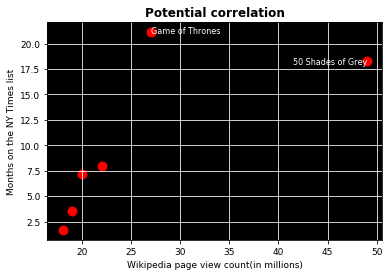

In [34]:
#26 plotting the results


fig, ax = plt.subplots(figsize=(6,4))
#x = Combo['Wiki_Page_Visits']
#y = Combo['NYT_Rank(avg)']
ax.scatter(Combo['Wiki_Page_Visits'],Combo['Months_on_NYT_list(avg)'],s =80, color = 'red')
ax.set_title('Potential correlation', color = 'black', size = 12,fontweight="bold")
plt.xlabel('Wikipedia page view count(in millions)', size = 9)
plt.ylabel('Months on the NY Times list',size = 9)
ax.set_facecolor('black')
#ax2= plt.scatter(a,b)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = "white"
#fig1, ax1 = plt.subplots()

plt.text(27,21,'Game of Thrones', color = 'white', size = 8 )
plt.text(49,18,'50 Shades of Grey', color = 'white', horizontalalignment = 'right', size = 8)
plt.savefig('Prelim2.png')

ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)

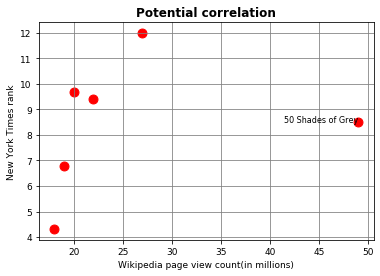

In [57]:
# white background

fig, ax = plt.subplots(figsize=(6,4))
#x = Combo['Wiki_Page_Visits']
#y = Combo['NYT_Rank(avg)']
ax.scatter(Combo['Wiki_Page_Visits'],Combo['NYT_Rank(avg)'],s =80,  color = 'red')
ax.set_title('Potential correlation', color = 'black',size = 12,fontweight="bold")
plt.xlabel('Wikipedia page view count(in millions)', size = 9)
plt.ylabel('New York Times rank', size = 9)
#ax.set_facecolor('black')
#ax2= plt.scatter(a,b)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = "grey"
#fig1, ax1 = plt.subplots()

plt.text(49,8.5,'50 Shades of Grey', color = 'black', horizontalalignment = 'right', size = 8)

ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)

plt.savefig('Prelim3.png')

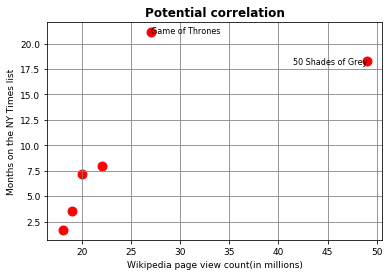

In [58]:
fig, ax = plt.subplots(figsize=(6,4))
#x = Combo['Wiki_Page_Visits']
#y = Combo['NYT_Rank(avg)']
ax.scatter(Combo['Wiki_Page_Visits'],Combo['Months_on_NYT_list(avg)'],s =80, color = 'red')
ax.set_title('Potential correlation', color = 'black', size = 12,fontweight="bold")
plt.xlabel('Wikipedia page view count(in millions)', size = 9)
plt.ylabel('Months on the NY Times list',size = 9)
#ax.set_facecolor('black')
#ax2= plt.scatter(a,b)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = "grey"
#fig1, ax1 = plt.subplots()

plt.text(27,21,'Game of Thrones', color = 'black', size = 8 )
plt.text(49,18,'50 Shades of Grey', color = 'black', horizontalalignment = 'right', size = 8)
plt.savefig('Prelim4.png')

ax.tick_params(axis='both', which='major', labelsize=9)
ax.tick_params(axis='both', which='minor', labelsize=9)